In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import glob
from radioReduction import *
from astropy.stats import LombScargle
from scipy import optimize
from scipy.interpolate import make_interp_spline, BSpline
import glob

In [209]:
LL = glob.glob('1315/*-LL.dat')
RR =  glob.glob('1315/*-RR.dat')

time = 120

ll = []
llErr = []
llMjd = []

rr = []
rrErr = []
rrMjd = []

master = []
dtmin = []
stI = []
stV = []
stErr = []
polFrac = []

for i in LL:
    x = pd.read_table(i)
    date = int(x['mjd'].mean())
    if  date >= 57704 or date <= 57773:
        x = binning(x,time,2)
        ll.append(x['re'])
        llErr.append(x['ure'])
        llMjd.append(date)
    else: 
        x = binning(x,time)
        ll.append(x['re'])
        llErr.append(x['ure'])
        llMjd.append(date)
    
for i in RR:
    x = pd.read_table(i)
    date = int(x['mjd'].mean())
    if  date >= 57704 or date <= 57773:
        x = binning(x,time,2)
        rr.append(x['re'])
        rrErr.append(x['ure'])
        dtmin.append(x['dtmin'])
        rrMjd.append(date)
    else: 
        x = binning(x,time)
        rr.append(x['re'])
        rrErr.append(x['ure'])
        dtmin.append(x['dtmin'])
        rrMjd.append(date)

ll = np.array(ll)
llErr = np.array(llErr)

rr = np.array(rr)
rrErr = np.array(rrErr)

dtmin = np.array(dtmin)

stI = (rr+ll)*.5
stV = (rr-ll)*.5
frac = stV/stI
stErr = ((rrErr**2+llErr**2)**(.5))*.5


In [210]:
left = pd.DataFrame(data={'mjd':llMjd,'ll':ll,'ull':llErr})
right = pd.DataFrame(data={'dtmin':dtmin,'mjd':rrMjd,'rr':rr,'urr':rrErr})

In [211]:
master = pd.merge(left,right,on='mjd')

In [212]:
master = master.sort_values('mjd')
master = master.rename(columns={ 'll_x':'ll', 'ull_x':'ull', 'rr_y':'rr', 'urr_y':'urr'})

In [213]:
stI = []
stV = []
stErr = []
mjd = []
dtmin = []
frac = []
fracErr = []

for i in range(master.shape[0]):
    dt = master.iloc[i]
    stI.append((dt['rr']+dt['ll'])*.5)
    stV.append((dt['rr']-dt['ll'])*.5)
    stErr.append(np.sqrt(dt['urr']**2+dt['ull']**2)*.5)
    dtmin.append(dt['dtmin'])
    mjd.append(dt['mjd'])
    frac.append(((dt['rr']-dt['ll'])*.5)/(dt['rr']+dt['ll'])*.5)
    fracErr.append(np.abs(((dt['rr']-dt['ll'])*.5)/(dt['rr']+dt['ll'])*.5)*np.sqrt((dt['urr']/dt['rr'])**(2)+(dt['ull']/dt['ll'])**2))
    
stI = np.array(stI)
stV = np.array(stV)
stErr = np.array(stErr)
mjd = np.array(mjd)
dtmin = np.array(dtmin)
frac = np.array(frac)
fracErr = np.array(fracErr)

In [214]:
stokes = pd.DataFrame(data={'mjd':mjd,'dtmin':dtmin,'stI':stI,'stV':stV,'stErr':stErr,'frac':frac,'fracErr':fracErr})

In [215]:
list(stokes)

['mjd', 'dtmin', 'stI', 'stV', 'stErr', 'frac', 'fracErr']

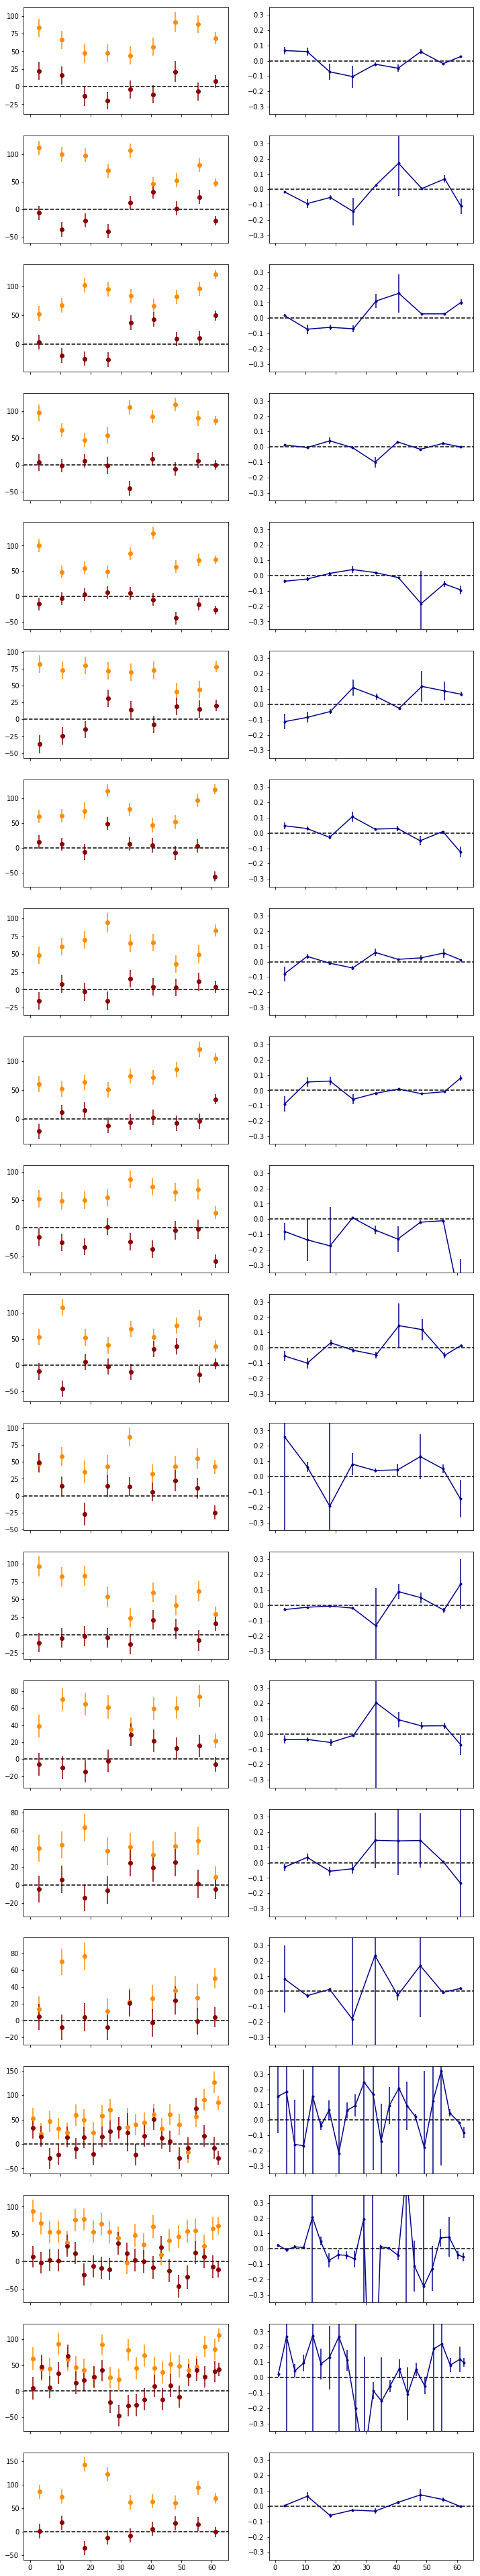

In [216]:
fig, ax = plt.subplots(nrows=20,ncols=2,sharex=True,figsize=(12,70))

for i in range(20):
    yerr = stokes.iloc[i][4]
    ax[i][0].errorbar(stokes.iloc[i][1],stokes.iloc[i][2],yerr=stokes.iloc[i][4],linestyle='None',color='darkorange',marker='o')
    ax[i][0].errorbar(stokes.iloc[i][1],stokes.iloc[i][3],yerr=stokes.iloc[i][4],linestyle='None',color='darkred',marker='o')
    ax[i][0].axhline(y=0,color='black',linestyle='dashed')
    ax[i][1].errorbar(stokes.iloc[i][1],stokes.iloc[i][5],yerr=stokes.iloc[i][6],color='darkblue',marker='.')
    ax[i][1].axhline(y=0,color='black',linestyle='dashed')
    ax[i][1].set_ylim(-0.35,0.35)


    
plt.show()

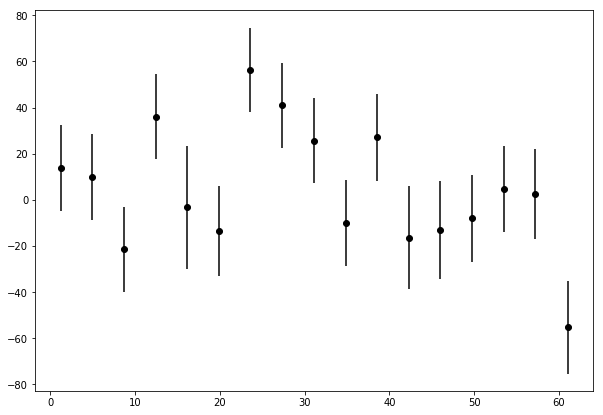

In [150]:
i = 6

plt.figure(figsize=(10,7))
plt.errorbar(stokes.iloc[i][1],stokes.iloc[i][3],yerr=stokes.iloc[i][4],label='%s'%(stokes.iloc[i][0]),linestyle='None',color='k',marker='o')
plt.show()

In [159]:
x

,mjd,dtmin,re,ure,im,uim,abs,uabs,nsamp,secs
-0.0,57550.128856,1.208333,58.470536,28.055743,15.173248,153.659663,161.595851,153.613804,5000.000000,72.500000
1.0,57550.131457,4.952778,18.594262,26.777684,-7.143650,146.200473,166.481475,146.499885,5380.800000,297.166667
2.0,57550.134057,8.697222,40.874325,26.612843,5.731961,144.980337,188.225155,145.249996,5408.000000,521.833333
3.0,57550.136657,12.441667,85.242962,26.525064,-11.489384,145.261480,214.030377,145.182447,5408.000000,746.500000
4.0,57550.139258,16.186111,92.002417,27.322338,-30.883238,149.913020,214.487107,149.847776,5108.800000,971.166667
5.0,57550.141929,20.033333,65.078736,27.809926,-35.813661,151.943028,223.479212,151.948560,4999.933333,1202.000000
6.0,57550.144578,23.847222,57.840191,26.896462,73.723024,147.307846,176.808380,147.262947,5272.000000,1430.833333
7.0,57550.147178,27.591667,19.572282,26.451050,-24.792999,145.086495,177.135190,145.027300,5408.000000,1655.500000
8.0,57550.149778,31.336111,20.595168,26.491138,-37.006052,144.722516,152.703878,144.891447,5408.000000,1880.166667
9.0,57550.152379,35.080556,116.480447,26.403828,-28.310548,145.162968,203.510902,144.716453,5408.000000,2104.833333
